# DS 7331 - Machine Learning - Course Project
Team: Allison Roderick, Jayson Barker, Sandesh Ojha, Brandon Croom

Lab Number: 2

## Data Preparation - 15pts
The following cells setup the notebook for use and analysis

In [1]:
# Import libraries for data analysis
import numpy as np 
import pandas as pd 
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display,HTML
from sklearn import ensemble
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import utils
from sklearn import neighbors
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter('ignore')

# show all columns
pd.set_option('display.max_columns', None) 

#Set the seaborn plotting style
sns.set(style="darkgrid")

In [3]:
#Read in the train/test files that have been created from the prior projects. This is an 80/20 split
train_file = 'train.csv'
test_file = 'test.csv'

test_filepath_SO = "C:/Users/sojha.WVOFFICE.000/Documents/SMU/Spring 2020/Machine Learning I/Lab 2/"
train_filepath_SO = "C:/Users/sojha.WVOFFICE.000/Documents/SMU/Spring 2020/Machine Learning I/Lab 2/"

#Remove this and use the one below if you are running in the entire dataset
#df_test = pd.read_csv(test_filepath_SO + test_file)#[:500000]
#df_train = pd.read_csv(train_filepath_SO + train_file)#[:500000]

df_test_in = pd.read_csv(test_filepath_SO + test_file)
df_train_in = pd.read_csv(train_filepath_SO + train_file)

df_test = df_test_in[df_test_in["ST_TX"]==1]
df_train = df_train_in[df_train_in["ST_TX"]==1]

df_train.head()


,Unnamed: 0,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Start_Hour,Time_Duration(min),State,Timezone,Start_Time,Weather_Condition,SM_Interim,Side_,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Start_Weekday_Fri,Start_Weekday_Mon,Start_Weekday_Sat,Start_Weekday_Sun,Start_Weekday_Thu,Start_Weekday_Tue,Start_Weekday_Wed,Start_Month_Apr,Start_Month_Aug,Start_Month_Dec,Start_Month_Feb,Start_Month_Jan,Start_Month_Jul,Start_Month_Jun,Start_Month_Mar,Start_Month_May,Start_Month_Nov,Start_Month_Oct,Start_Month_Sep,ST_AL,ST_AR,ST_AZ,ST_CA,ST_CO,ST_CT,ST_DC,ST_DE,ST_FL,ST_GA,ST_IA,ST_ID,ST_IL,ST_IN,ST_KS,ST_KY,ST_LA,ST_MA,ST_MD,ST_ME,ST_MI,ST_MN,ST_MO,ST_MS,ST_MT,ST_NC,ST_ND,ST_NE,ST_NH,ST_NJ,ST_NM,ST_NV,ST_NY,ST_OH,ST_OK,ST_OR,ST_PA,ST_RI,ST_SC,ST_SD,ST_TN,ST_TX,ST_UT,ST_VA,ST_VT,ST_WA,ST_WI,ST_WV,ST_WY,Weather_Condition_Collapsed_Ash,Weather_Condition_Collapsed_Clear,Weather_Condition_Collapsed_Clear/Windy,Weather_Condition_Collapsed_Cloudy,Weather_Condition_Collapsed_Cloudy/Windy,Weather_Condition_Collapsed_Dust,Weather_Condition_Collapsed_Dust/Windy,Weather_Condition_Collapsed_Fog,Weather_Condition_Collapsed_Fog/Windy,Weather_Condition_Collapsed_Icy,Weather_Condition_Collapsed_Icy/Snow,Weather_Condition_Collapsed_Icy/Windy,Weather_Condition_Collapsed_Rain,Weather_Condition_Collapsed_Rain/Snow,Weather_Condition_Collapsed_Rain/Windy,Weather_Condition_Collapsed_Rainy,Weather_Condition_Collapsed_Sand,Weather_Condition_Collapsed_Sand/Windy,Weather_Condition_Collapsed_Smoke,Weather_Condition_Collapsed_Smoke/Windy,Weather_Condition_Collapsed_Snow,Weather_Condition_Collapsed_Snow/Windy,Weather_Condition_Collapsed_Snowy,Weather_Condition_Collapsed_Tornado,TMC_200.0,TMC_201.0,TMC_202.0,TMC_203.0,TMC_206.0,TMC_222.0,TMC_229.0,TMC_236.0,TMC_239.0,TMC_241.0,TMC_244.0,TMC_245.0,TMC_246.0,TMC_247.0,TMC_248.0,TMC_336.0,TMC_339.0,TMC_341.0,TMC_343.0,TMC_351.0,TMC_406.0
32408,32408,0.0,32.860638,-96.719559,0.0,90.0,93.0,57.0,29.77,10.0,10.4,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0,62.0,TX,US/Central,2016-06-14 20:06:43,Partly Cloudy,Jun,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32416,32416,0.0,30.335411,-97.703049,0.0,89.1,93.0,61.0,29.80,10.0,5.8,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,51.0,TX,US/Central,2016-06-14 20:17:03,Clear,Jun,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32423,32423,0.0,29.757492,-95.365791,0.0,86.0,93.0,66.0,29.84,8.0,9.2,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,46.0,TX,US/Central,2016-06-14 20:21:49,Clear,Jun,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32431,32431,0.0,29.821486,-95.368080,0.0,84.2,93.0,70.0,29.84,8.0,9.2,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0,46.0,TX,US/Central,2016-06-14 20:26:55,Clear,Jun,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32460,32460,0.0,32.871536,-96.683105,0.0,88.0,93.0,61.0,29.78,10.0,8.1,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0,30.0,TX,US/Central,2016-06-14 20:49:39,Scattered Clouds,Jun,0,1,0,0,1,0,

In [4]:
#build two training/test sets for distance
#Build the Distance dataframes
df_X_train = df_train.copy()
df_X_test = df_test.copy()


df_Y_train = df_X_train['Distance(mi)'].copy()
df_Y_test = df_X_test['Distance(mi)'].copy()

#list columns to remove:
removeList = {'Severity', 'Weather_Condition','SM_Interim','State','Timezone','Start_Time','Unnamed: 0', 'TMC_200.0',
              'TMC_201.0','TMC_202.0','TMC_203.0',
              'TMC_206.0','TMC_222.0','TMC_229.0',
              'TMC_236.0','TMC_239.0','TMC_241.0',
              'TMC_244.0','TMC_245.0','TMC_246.0',
              'TMC_247.0','TMC_248.0','TMC_336.0',
              'TMC_339.0','TMC_341.0','TMC_343.0',
              'TMC_351.0','TMC_406.0','ST_AL','ST_AR','ST_AZ','ST_CA','ST_CO','ST_CT','ST_DC','ST_DE',
              'ST_FL','ST_GA','ST_IA','ST_ID','ST_IL','ST_IN','ST_KS','ST_KY','ST_LA','ST_MA','ST_MD',
              'ST_ME','ST_MI','ST_MN','ST_MO','ST_MS','ST_MT','ST_NC','ST_ND','ST_NE','ST_NH','ST_NJ',
              'ST_NM','ST_NV','ST_NY','ST_OH','ST_OK','ST_OR','ST_PA','ST_RI','ST_SC','ST_SD','ST_TN',
              'ST_TX','ST_UT','ST_VA','ST_VT','ST_WA','ST_WI','ST_WV','ST_WY'}

df_X_train.drop(removeList,1,inplace=True)
df_X_test.drop(removeList,1,inplace=True)

In [5]:
#Convert dataframes to numpy arrays

X_train = df_X_train.to_numpy()
X_test = df_X_test.to_numpy()

Y_train = df_Y_train.to_numpy()
Y_test = df_Y_test.to_numpy()

In [6]:
print("X-train: ",df_X_train.shape)
print("X-test: ",df_X_test.shape)
print("Y-train: ",df_Y_train.shape)
print("Y-test: ",df_Y_test.shape)

X-train:  (204615, 73)
X-test:  (48314, 73)
Y-train:  (204615,)
Y-test:  (48314,)


In [7]:
#NOTE: Code below adapted from the course lectures
# we want to normalize the features based upon the mean and standard deviation of each column. 

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set 

## Modeling and Evaluation - 70pts

### K Neighbors Regressor

In [8]:
%%time

for K in range(1,4):
    reg = KNeighborsRegressor(n_neighbors=K,weights='distance',algorithm='kd_tree',leaf_size=30,p=3,metric='minkowski')
    reg.fit(X_train_scaled,Y_train)
    yhat = reg.predict(X_test_scaled)
    score = reg.score(X_test_scaled, Y_test)
    predict_ev = mt.explained_variance_score(Y_test, yhat)
    predict_mae = mt.mean_absolute_error(Y_test, yhat)
    predict_mse = mt.mean_squared_error(Y_test, yhat)  
    predict_score2 = mt.r2_score(Y_test, yhat)
    
    print('R^2 with %d neighbors is: %.2f'%(K,score))
    print("EV: ",predict_ev)
    print("MAE: ",predict_mae)
    print("MSE: ",predict_mse)
    print("R^2: ",predict_score2)


R^2 with 1 neighbors is: 0.85
EV:  0.8537852644332501
MAE:  0.03063915227195286
MSE:  0.032753872863371974
R^2:  0.8534282848466961
R^2 with 2 neighbors is: 0.87
EV:  0.8752504544863259
MAE:  0.030210487829659217
MSE:  0.027962575022590586
R^2:  0.8748690697353431
R^2 with 3 neighbors is: 0.88
EV:  0.877698309252151
MAE:  0.03053010389518332
MSE:  0.027427006606652794
R^2:  0.8772657078866051
Wall time: 1h 20min 33s


Automatically created module for IPython interactive environment


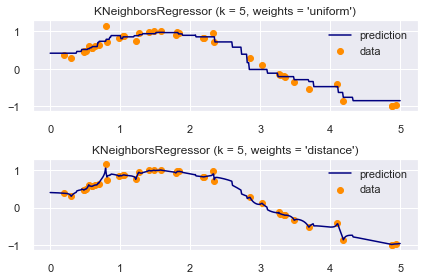

In [82]:
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#         Fabian Pedregosa <fabian.pedregosa@inria.fr>
#
# License: BSD 3 clause (C) INRIA


# #############################################################################
# Generate sample data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()


# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()

In [12]:
predict_ev

-0.5003860166499721

In [35]:
%%time
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train_scaled,Y_train)
print(reg.score(X_test_scaled, Y_test))

0.5563457370945181
Wall time: 62.5 ms


In [20]:
%%time
reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(X_train_scaled,Y_train)
print(reg.score(X_test_scaled, Y_test))

0.5726549457095873
Wall time: 78.1 ms


In [22]:
%%time
reg = KNeighborsRegressor(n_neighbors=7)
reg.fit(X_train_scaled,Y_train)
print(reg.score(X_test_scaled, Y_test))

0.5026160475133779
Wall time: 62.5 ms


In [25]:
%%time
reg = KNeighborsRegressor(n_neighbors=9)
reg.fit(X_train_scaled,Y_train)
print(reg.score(X_test_scaled, Y_test))

0.2744581468234242
Wall time: 84.6 ms


## Model Deployment - 5pts

## Exceptional Work - 10pts